In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


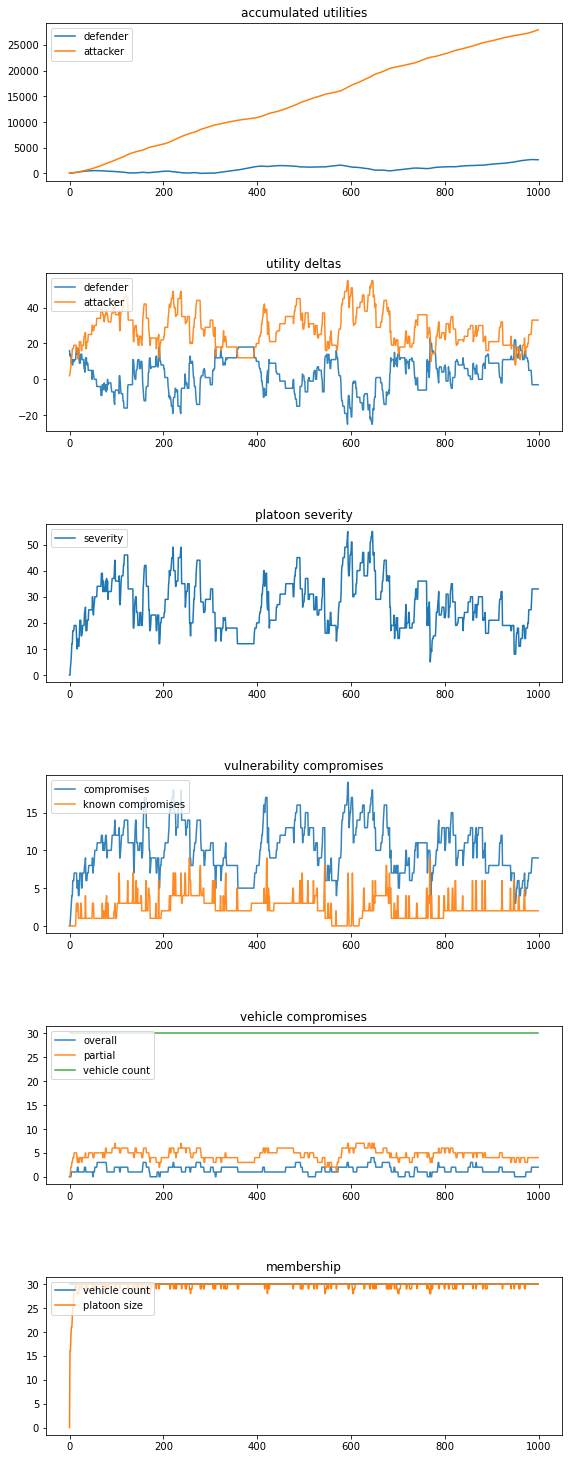

In [3]:
from importlib import reload
import vehicles
import game
import agents
import evaluation
reload(vehicles)
reload(game)
reload(agents)
reload(evaluation)

engine = evaluation.Evaluator(
    # attacker=agents.PassiveAgent(),
    attacker=agents.BasicAttackerAgent(1),
    defender=agents.BasicDefenderAgent(monitor_limit=1),
    vehicles=vehicles.JsonVehicleProvider("../subgame/python/solutions.json"),
    game_config=game.GameConfig(
        max_vehicles=30,
        cycle_every=3,
        cycle_num=5,
        cycle_allow_platoon=False
    ),
    num_rounds=1000
)
engine.run()
engine.plot()

In [2]:
from vehicles import CompromiseState
sum([vuln.severity for vehicle in engine.game.state.vehicles for vuln in vehicle.vulnerabilities if vehicle.in_platoon and vuln.state != CompromiseState.NOT_COMPROMISED])

145

## No cycling, no monitoring

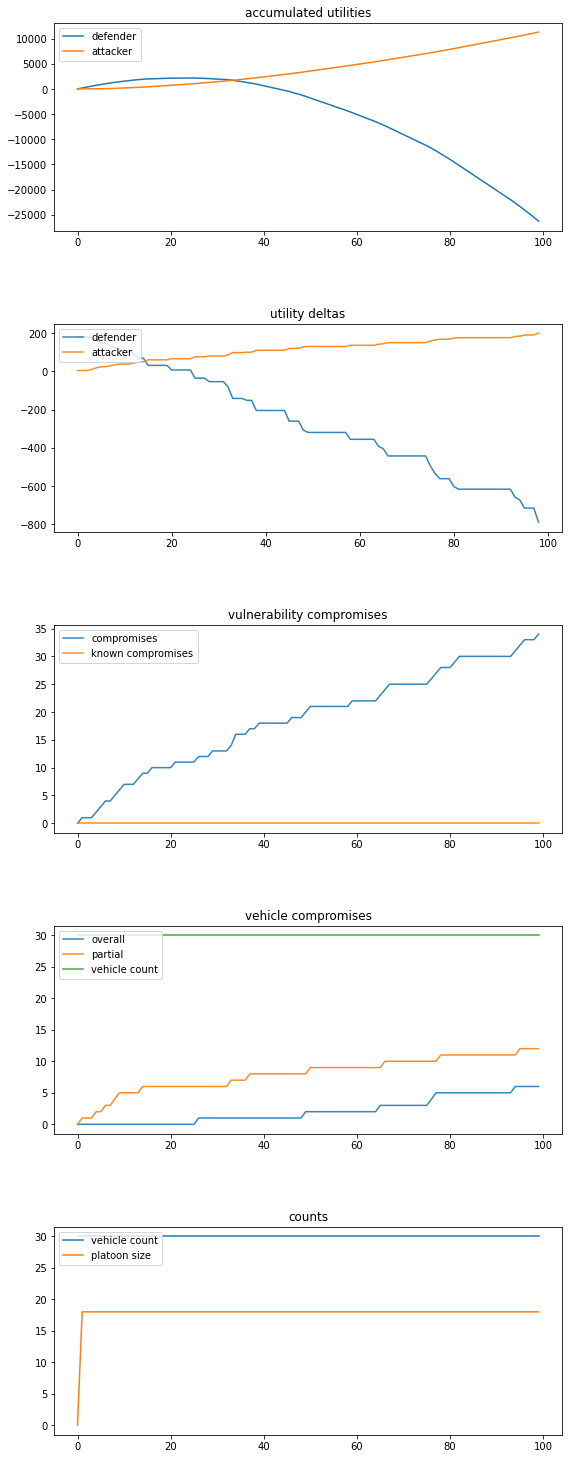

In [5]:
# from importlib import reload
import vehicles
import game
import agents
import evaluation

engine = evaluation.Evaluator(
    # attacker=agents.PassiveAgent(),
    attacker=agents.BasicAttackerAgent(),
    defender=agents.BasicDefenderAgent(monitor_limit=0),
    vehicles=vehicles.JsonVehicleProvider("../subgame/python/solutions.json"),
    game_config=game.GameConfig(
        max_vehicles=30,
        cycle_every=None
    ),
    num_rounds=100
)
engine.run()
engine.plot()

## Cycling enabled, no monitoring

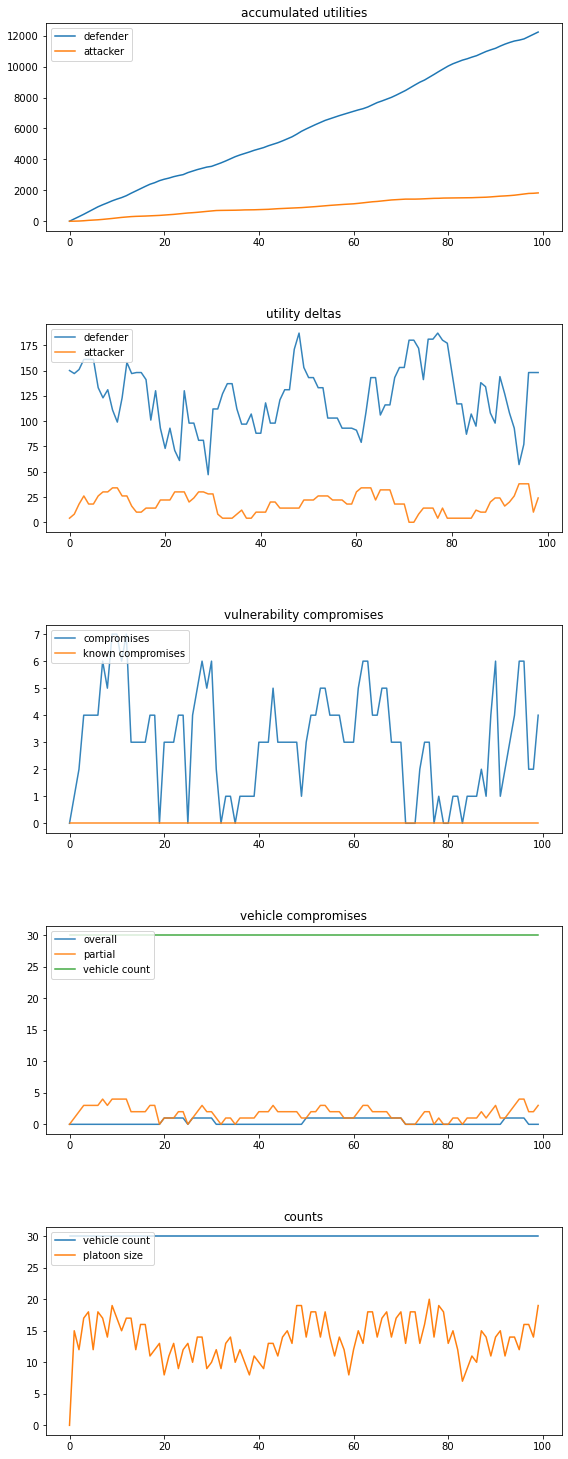

In [1]:
# from importlib import reload
import vehicles
import game
import agents
import evaluation

engine = evaluation.Evaluator(
    # attacker=agents.PassiveAgent(),
    attacker=agents.BasicAttackerAgent(),
    defender=agents.BasicDefenderAgent(monitor_limit=0),
    vehicles=vehicles.JsonVehicleProvider("../subgame/python/solutions.json"),
    game_config=game.GameConfig(
        max_vehicles=30,
        cycle_every=3,
        cycle_num=7,
        cycle_allow_platoon=True,
    ),
    num_rounds=100
)
engine.run()
engine.plot()

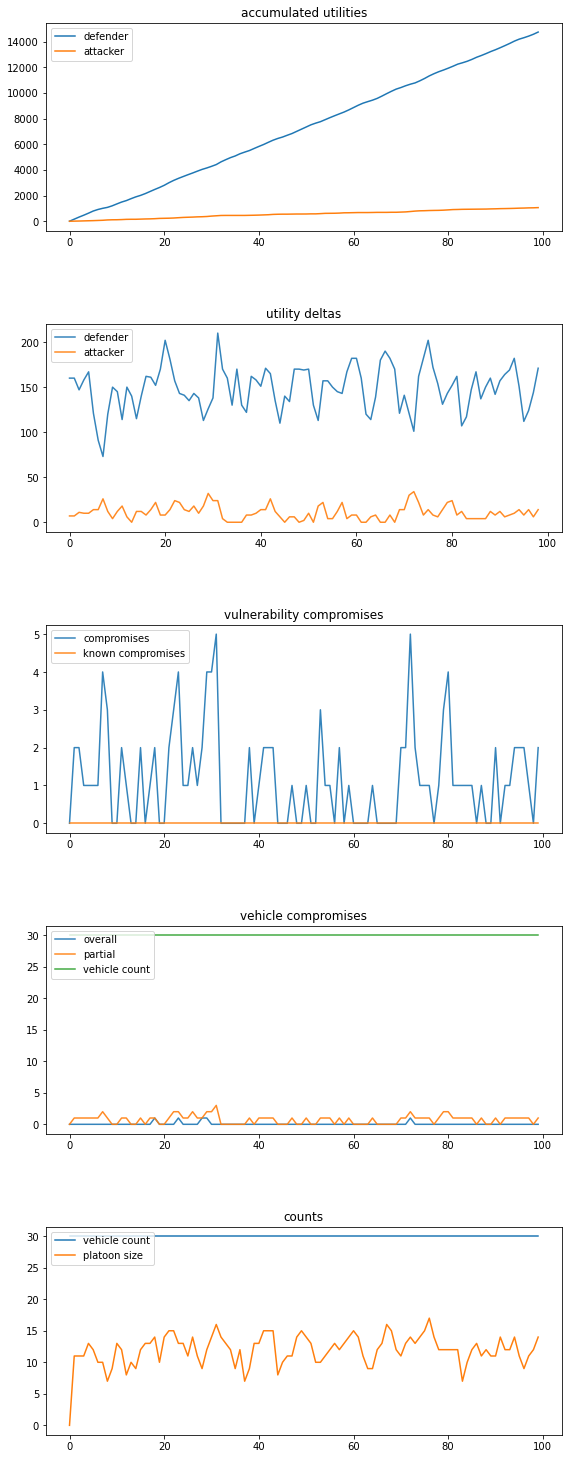

In [3]:
# from importlib import reload
import vehicles
import game
import agents
import evaluation

engine = evaluation.Evaluator(
    # attacker=agents.PassiveAgent(),
    attacker=agents.BasicAttackerAgent(),
    defender=agents.BasicDefenderAgent(monitor_limit=0),
    vehicles=vehicles.JsonVehicleProvider("../subgame/python/solutions.json"),
    game_config=game.GameConfig(
        max_vehicles=30,
        cycle_every=1,
        cycle_num=7,
        cycle_allow_platoon=True
    ),
    num_rounds=100
)
engine.run()
engine.plot()